<h1>N-탐색적데이터분석 기말과제</h1>

2016110838 행정학전공 홍서이

코드 출처 SAMET ARDA ERDOGAN, "Students Performance: 📈 EDA and 📊 Visualization", 
https://www.kaggle.com/code/sametardaerdogan/students-performance-eda-and-visualization

데이터셋 출처 "Students Performance in Exams", https://www.kaggle.com/datasets/spscientist/students-performance-in-exams



추가한 내용

<h1 style="text-align:center">   
      <font color = blue >
                Students Performance: 📈 EDA and 📊 Visualization  
        </font>    
</h1>

<hr style="width:100%;height:5px;border-width:0;color:gray;background-color:gray"> 



<h2 style ="background:#333399;border:0;color:white"><b>목차:</b></h2>
<font color = #333399>  

1. [First Step](#0)
    * [Import The Required Libraries](#1)
    * [Load Dataset](#2)  
    * [Real Dataset 복제](#3)
    * [Data Frame Info And Missing Values](#4)
    * [First look](#5)
    * [Columns 이름 재설정](#6)
    * [새 Column "average_score" 생성](#7)
    * [Describe Data Frame](#8)
    * [새 컬럼 "grade" 생성](#9)
    
    
2. [Visualization](#10)
    * [Grade Pie Chart](#11)
    * [Score Heatmap](#12)
    * [Grades와 Gender 비교](#99)
    
    
3. [알고자 하는 것 ](#13)
    * [Q1: Average score에 gender과 education이 미치는 영향은 무엇인가?](#14)
    * [Q2: Average score에 gender와 test preparation course가 미치는 영향은 무엇인가?](#15)
    * [Q3: Average_score를 기준으로 어떤 group이 가장 성공적인가?](#16)
 
4. [추가 내용]

<a id = "0" ></a>

<a id="1"></a> <br>
<h2 style ="background:#c0f099;border:0;">Import The Required Libraries</h2>

In [1]:
!pip install missingno

In [2]:

import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno

sns.set_palette("tab10")

<a id="2"></a> <br>
<h2 style ="background:#c0f099;border:0;">Load Dataset</h2>

In [3]:
data = pd.read_csv("StudentsPerformance.csv")

<a id="3"></a> <br>
<h2 style ="background:#c0f099;border:0;">Copy Real Dataset</h2>

In [4]:
df = data.copy()

<a id="4"></a> <br>
<h2 style ="background:#c0f099;border:0;">Data Frame Info And Missing Values</h2>


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


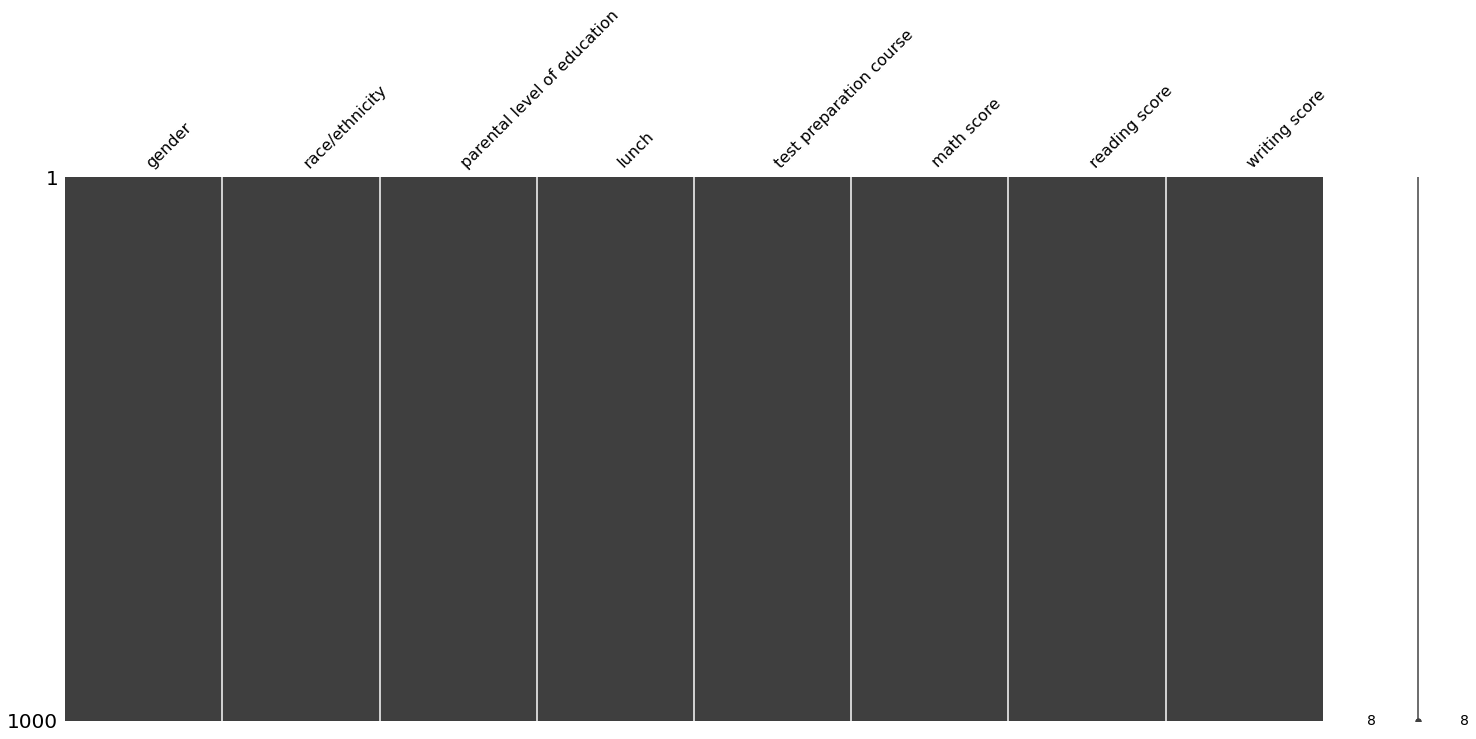

In [6]:
#결측치 표현 그래프
msno.matrix(df);

<font color=blue>>> </font><b>결측치 없음</b>

<a id="5"></a> <br>
<h2 style ="background:#c0f099;border:0;">First look</h2>


In [7]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

<font color=blue>>> </font><b>Data Frame은 보기에 괜찮아보임. 하지만 column 이름을 바꾸면 더 좋을 것 같음.</b>

In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

<h2 style="text-align:center;"> Information About Columns</h2>
   <table style="width:100%">
     <tr>
       <th>Column Name</th>
       <th>Description</th>
    </tr>
    <tr>
       <td>gender</td>
       <td>Male/ Female</td>
    </tr>
     <tr>
    <td>race/ethnicity</td>
    <td>A에서 E까지 그룹 분류</td>
  </tr>
  <tr>
    <td>parental level of education</td>
    <td>부모의 학력사항. 고졸부터 석사까지</td>
  </tr>
    <tr>
    <td>lunch</td>
    <td>선택한 점심 종류</td>
  </tr>
    <tr>
    <td>test preparation course</td>
    <td>Course 세부내용</td>
  </tr>
    <tr>
    <td>math score</td>
    <td>Mathematics에서 학생이 확보한 점수</td>
  </tr>
    <tr>
    <td>reading score</td>
    <td>Reading에서 학생이 확보한 점수</td>
  </tr>
    <tr>
    <td>writing score</td>
    <td>Writing에서 학생이 확보한 점수</td>
  </tr>
</table>
<a id = "attribute" ></a>

<a id="6"></a> <br>
<h2 style ="background:#c0f099;border:0;">읽기 쉽도록 column 이름 변경</h2>

In [9]:
df.rename(inplace= True,
          columns={"race/ethnicity":"race_ethnicity",
                   "parental level of education":"education_level",
                   "test preparation course":"prep_course",
                   "math score":"math_score",
                   "reading score":"reading_score",
                   "writing score":"writing_score"})

<a id="7"></a> <br>
<h2 style ="background:#c0f099;border:0;"> math_score, reading_score, writing_score의 평균인 새 컬럼 "average_score" 생성</h2>

In [10]:
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

<a id="8"></a> <br>
<h2 style ="background:#c0f099;border:0;">Describe our dataset and understand basic information</h2>

In [11]:
df.describe().T

count       mean        std   min        25%        50%  \
math_score     1000.0  66.089000  15.163080   0.0  57.000000  66.000000   
reading_score  1000.0  69.169000  14.600192  17.0  59.000000  70.000000   
writing_score  1000.0  68.054000  15.195657  10.0  57.750000  69.000000   
average_score  1000.0  67.770667  14.257326   9.0  58.333333  68.333333   

                     75%    max  
math_score     77.000000  100.0  
reading_score  79.000000  100.0  
writing_score  79.000000  100.0  
average_score  77.666667  100.0

<font color=blue>>> </font><b>score간 평균(mean)과 표준편차(std)가 매우 유사하다.</b>

<a id="9"></a> <br>
<h2 style ="background:#c0f099;border:0;">새 컬럼 "grade" 생성하고 학점 할당하기</h2>

In [12]:
def Grade(AverageScore):
    if (AverageScore >= 80):return 'A'
    if (AverageScore >= 70):return 'B'
    if (AverageScore >= 60):return 'C'
    if (AverageScore >= 50):return 'D'
    if (AverageScore >= 40):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["average_score"]), axis=1)

<a id = "10" ></a>

<a id="11"></a> <br>
<h2 style ="background:#c0f099;border:0;">grade 분포를 확인하기 위한 pie 그래프를 그려보자.</h2>

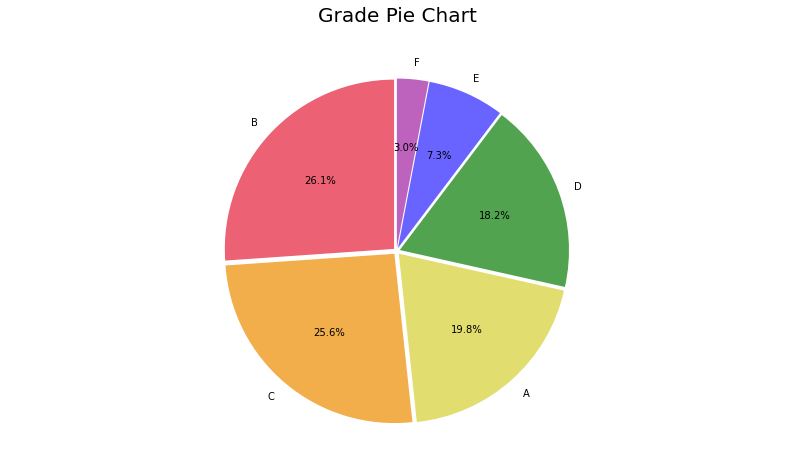

In [13]:
plt.figure(figsize=(14, 7))
labels=df['grade'].value_counts().index
plt.pie(df['grade'].value_counts().values,labels=labels,explode=[0.02,0.02,0.02,0.02,0.02,0.02],colors=["#EC6173", "#F1AE4A", "#E1DD6E", "#51A350", "#6964FF", "#BD63BE"],
        autopct='%1.1f%%', startangle=90)
plt.title('Grade Pie Chart',fontsize=20,pad=40)
plt.axis('equal')
plt.show()

<font color=blue>>> </font><b> 대다수의 학생들이 "B", "C" grade를 받았다. (51.7%) 이는 위의 Dataframe description의 평균을 통해서도 확인할 수 있다.</b>

<a id="99"></a> <br>
<h2 style ="background:#c0f099;border:0;">Grades와 Gender를 비교해보자 </h2>

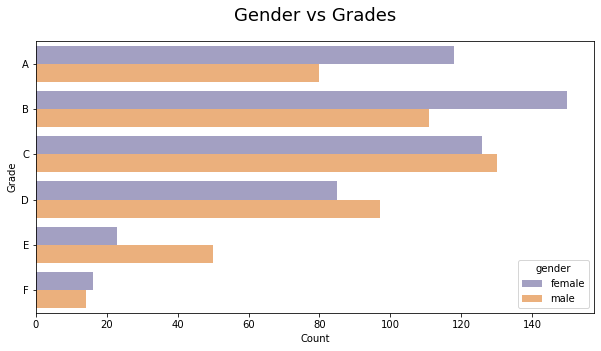

In [14]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y="grade", hue="gender", data=df, order=["A","B","C","D","E","F"], palette="tab20c_r")
plt.title('Gender vs Grades', fontsize=18,pad=20)
plt.xlabel("Count")
plt.ylabel("Grade")
plt.show()

<a id="12"></a> <br>
<h2 style ="background:#c0f099;border:0;">Score Heatmap 확인해보기</h2>

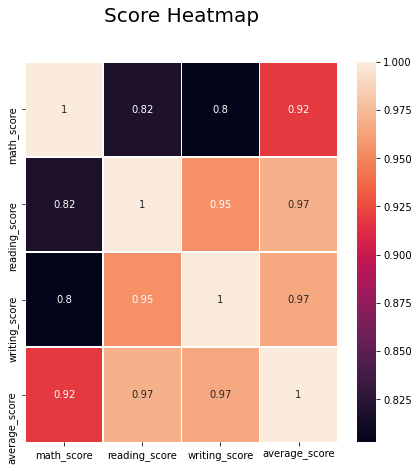

In [15]:
plt.figure(figsize=(7,7))
plt.title('Score Heatmap',color='Black',fontsize=20,pad=40)
sns.heatmap(df.corr(),annot=True,linewidths=.5);

<font color=blue>>> </font><b> score들이 서로 관련성이 높은 것을 볼 수 있다. 학생들은 math,reading,writing 3가지 분야에서 평균적인 성공을 거둔 것으로 보인다.</b>

<a id="13"></a> <br>
<center><h1 style ="background: #e60000;border:0;color:white">What I want to know</h1></center><br>

<a id="14"></a> <br>
<h2 style ="background:#9cfefa;border:0;"><font color="grey">Q1: </font> Average score에 gender과 education이 미치는 영향은 무엇인가?</h2>

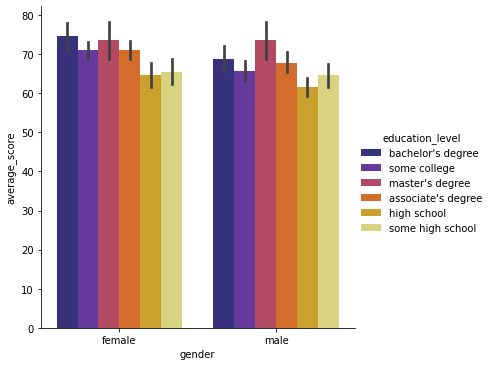

In [16]:
sns.catplot(data=df,x="gender",y="average_score",hue="education_level",kind="bar",height=5, palette="CMRmap");

<font color=blue>>></font><b>여성의 경우 bachelor's degree(학사 학위), master's degree(석사 학위)를 가진 여성의 average score가 더 높으며 남성의 경우는 master's degree를 가진 경우 average score가 높지만 bachelor's degree의 경우 그렇지 않았다. </b>

### -----------------------------------------------------------------------------------------

<a id="15"></a> <br>
<h2 style ="background:#9cfefa;border:0;"><font color="grey">Q2: </font>Average score에 gender와 test preparation course가 미치는 영향은 무엇인가?</h2>

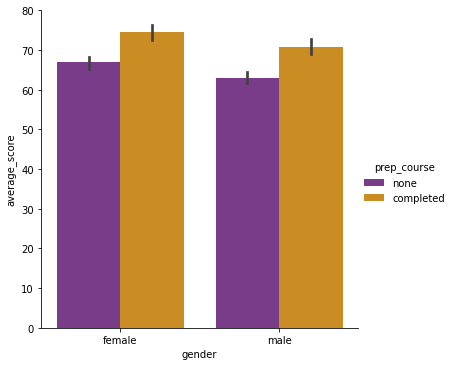

In [17]:
sns.catplot(data=df,x="gender",y="average_score",hue="prep_course",kind="bar",height=5,palette="CMRmap");

<font color=blue>>> </font><b>preparation course를 수행한 학생들의 average score가 더 높았다. 그러나 그 차이는 그렇게 크지 않다.</b>

### -----------------------------------------------------------------------------------------

<a id = "16" ></a>
<h2 style ="background:#9cfefa;border:0;"><font color="grey">Q3:</font>  Average_score를 기준으로 어떤 group이 가장 성공적인가?</h2>


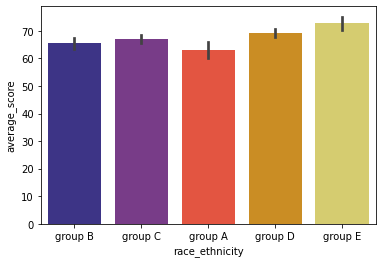

In [18]:
sns.barplot(x='race_ethnicity',y='average_score',data=df,palette="CMRmap");

<font color=blue>>> </font><b>group E가 가장 average score가 높은 성공적인 그룹이다. 그 이유에 대해 알아보자. </b>

In [19]:
df.groupby("race_ethnicity")["education_level"].describe()

count unique                 top freq
race_ethnicity                                      
group A           89      6    some high school   24
group B          190      6         high school   48
group C          319      6  associate's degree   78
group D          262      6        some college   67
group E          140      6  associate's degree   39

In [20]:
df.groupby("race_ethnicity")["prep_course"].describe()

count unique   top freq
race_ethnicity                        
group A           89      2  none   58
group B          190      2  none  122
group C          319      2  none  202
group D          262      2  none  180
group E          140      2  none   80

In [21]:
df.groupby("race_ethnicity")["grade"].describe()

count unique top freq
race_ethnicity                      
group A           89      6   C   24
group B          190      6   C   58
group C          319      6   B   87
group D          262      6   B   79
group E          140      6   A   44

<font color=blue>>> </font><b> Group E의 "education_level, prep_course, grade" 데이터를 살펴본 결과, education_level, prep_course를 통해서는 어떤 것도 찾지 못했으나 
grade를 확인한 결과, group E의 A 학점을 받은 비율이 61.6%로 매우 높은 것을 확인할 수 있었고 이것이 groupE의 average score가 높은 원인이었다.
</b>

<b>group별 데이터 분포도 살펴보자</b>

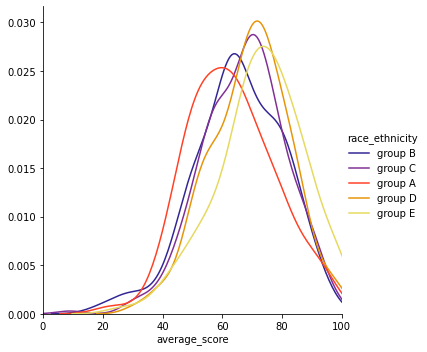

In [22]:
(sns
 .FacetGrid(df,
              hue="race_ethnicity",palette="CMRmap",
              height=5,
              xlim = (0,100))
 .map(sns.kdeplot, "average_score")
 .add_legend());

<font color=blue>>> </font><b>group E가 다른 그룹에 비해 average_score가 높다.</b>

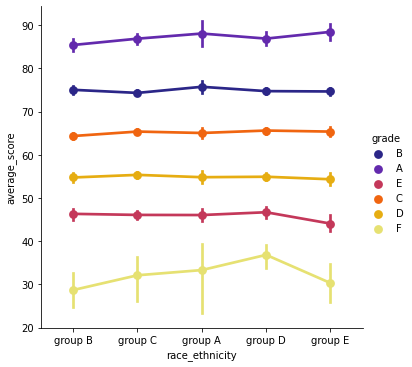

In [23]:
sns.catplot(x="race_ethnicity",y="average_score",hue="grade",kind="point",data=df,palette="CMRmap");

<font color=blue>>> </font><b>group E를 잘 보면, 성적이 낮은 학생은 적고 성적이 높은 학생은 많다는 것을 알 수 있다.</b>


<center><h2 style ="background:#fddcc6;border:0;">추가내용</h2></center>

In [24]:
df.head()

gender race_ethnicity     education_level         lunch prep_course  \
0  female        group B   bachelor's degree      standard        none   
1  female        group C        some college      standard   completed   
2  female        group B     master's degree      standard        none   
3    male        group A  associate's degree  free/reduced        none   
4    male        group C        some college      standard        none   

   math_score  reading_score  writing_score  average_score grade  
0          72             72             74      72.666667     B  
1          69             90             88      82.333333     A  
2          90             95             93      92.666667     A  
3          47             57             44      49.333333     E  
4          76             78             75      76.333333     B

부모의 educational level과 자식의 average_score의 관계를 살펴보자.


먼저, 카테고리형 변수인 educational_level을 수치형으로 변경하자.

In [25]:
df['education_level'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

가장 학력이 높은 master's degree부터 bachelor's degree, some college, associate's degree, high school, some high school 순서대로 6부터 1까지 점수를 매긴 새 컬럼 parents education을 생성하자.

In [26]:
for i in range(len(df)):
    if df.loc[i,'education_level'] == "master's degree":
        df.loc[i,'parent_education'] = 6
    
    elif df.loc[i, 'education_level'] == "bachelor's degree":
        df.loc[i,'parent_education'] = 5
    
    elif df.loc[i,'education_level'] == 'some college':
        df.loc[i,'parent_education'] = 4
    
    elif df.loc[i,'education_level'] == "associate's degree":
        df.loc[i,'parent_education'] = 3
    
    elif df.loc[i,'education_level'] == 'high school':
        df.loc[i,'parent_education'] = 2
    
    else:
        df.loc[i,'education_level'] = 1
        

In [27]:
df.head()

gender race_ethnicity     education_level         lunch prep_course  \
0  female        group B   bachelor's degree      standard        none   
1  female        group C        some college      standard   completed   
2  female        group B     master's degree      standard        none   
3    male        group A  associate's degree  free/reduced        none   
4    male        group C        some college      standard        none   

   math_score  reading_score  writing_score  average_score grade  \
0          72             72             74      72.666667     B   
1          69             90             88      82.333333     A   
2          90             95             93      92.666667     A   
3          47             57             44      49.333333     E   
4          76             78             75      76.333333     B   

   parent_education  
0               5.0  
1               4.0  
2               6.0  
3               3.0  
4               4.0

이제 데이터프레임에서 수치형 자료만 추출한 새 데이터프레임 df_num을 만들고, parent education과 average score의 scatterplot을 그려보자.

In [28]:
df_num = df[['math_score','reading_score','writing_score','average_score','parent_education', 'grade']]
df_num.head()

math_score  reading_score  writing_score  average_score  parent_education  \
0          72             72             74      72.666667               5.0   
1          69             90             88      82.333333               4.0   
2          90             95             93      92.666667               6.0   
3          47             57             44      49.333333               3.0   
4          76             78             75      76.333333               4.0   

  grade  
0     B  
1     A  
2     A  
3     E  
4     B

In [29]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   math_score        1000 non-null   int64  
 1   reading_score     1000 non-null   int64  
 2   writing_score     1000 non-null   int64  
 3   average_score     1000 non-null   float64
 4   parent_education  821 non-null    float64
 5   grade             1000 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB


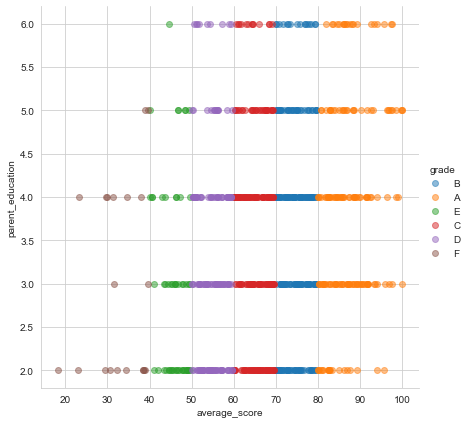

In [30]:
sns.set_style('whitegrid')
g = sns.FacetGrid(df_num, hue='grade', height=6)\
.map(plt.scatter, 'average_score', 'parent_education', alpha=0.5).add_legend()

1. average score가 50~100 사이 구간의 분포는 parent_education과 상관없이 유사하게 나타났다.
2. parent_education이 6.0 즉 부모가 master's degree를 갖고 있는 경우 자녀의 average score는 한 명을 제외하고 모두 50점 이상이었으며 50~60 사이의 average score를 갖는 학생의 수도 다른 경우에 비해 적었다.
3. parent_education이 2.0 즉 부모가 high school 졸업이 최종 학력인 경우 자녀의 average score는 다른 경우에 비해 average score가 40점 이하인 학생들이 많고 90점 이상인 학생들의 수가 적었다.


In [31]:
df['grade_rank'] = df['grade'].copy()

for i in range(len(df)):
    if df.loc[i,'grade'] == "A":
        df.loc[i,'grade_rank'] = 6
    
    elif df.loc[i, 'grade'] == "B":
        df.loc[i,'grade_rank'] = 5
    
    elif df.loc[i,'grade'] == 'C':
        df.loc[i,'grade_rank'] = 4
    
    elif df.loc[i,'grade'] == "D":
        df.loc[i,'grade_rank'] = 3
    
    elif df.loc[i,'grade'] == 'E':
        df.loc[i,'grade_rank'] = 2
    
    else:
        df.loc[i,'grade_rank'] = 1
    

<AxesSubplot:xlabel='grade_rank', ylabel='parent_education'>

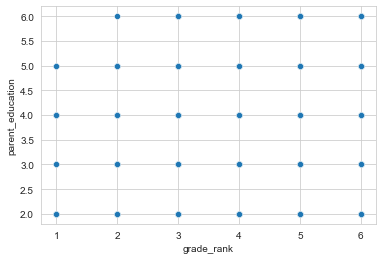

In [32]:
sns.scatterplot(data=df, x='grade_rank',y='parent_education')

<a id="15"></a> <br>
<h2 style ="background:#9cfefa;border:0;"><font color="grey"> 1. average score가 50~100 사이 구간의 분포는 parent_education과 상관없이 유사하게 나타났다.
</h2>
    
그러나 실제 표에서 수치를 확인해본 결과 average score가 50~100 사이인 구간에서 parent education에 따른 학생의 수는 차이가 있었다.

In [33]:
#average score가 50~100 사이인 parent education별로
df[(df['average_score']<100) & (df['average_score']>50)].groupby('parent_education')['average_score'].count()


parent_education
2.0    162
3.0    202
4.0    211
5.0    107
6.0     58
Name: average_score, dtype: int64

<a id="15"></a> <br>
<h2 style ="background:#9cfefa;border:0;"><font color="grey">2. parent_education이 6.0 즉 부모가 master's degree를 갖고 있는 경우 자녀의 average score는 한 명을 제외하고 모두 50점 이상이었으며 50~60 사이의 average score를 갖는 학생의 수도 다른 경우에 비해 적었다.</h2>

확인해본 결과 실제로 50점 이하의 학생은 1명이었다.
   

In [34]:
df[df['parent_education']==6.0]['average_score'].sort_values()

18     44.666667
607    50.666667
504    51.000000
162    51.333333
225    51.666667
14     53.666667
523    54.333333
422    57.333333
600    59.000000
789    59.333333
579    60.666667
735    61.000000
178    61.333333
812    61.666667
478    63.000000
892    63.333333
544    64.333333
32     64.333333
557    64.666667
79     66.000000
180    68.333333
850    68.333333
29     69.000000
940    70.000000
567    70.000000
167    70.666667
410    71.666667
389    72.666667
25     73.000000
549    73.333333
901    75.000000
259    75.666667
382    77.000000
752    77.000000
253    77.333333
508    78.000000
500    78.333333
128    79.333333
194    79.333333
713    82.000000
316    83.333333
781    83.666667
861    84.666667
130    85.000000
900    86.000000
845    86.333333
175    86.333333
618    86.666667
846    87.000000
604    87.666667
164    88.000000
941    88.333333
514    89.333333
2      92.666667
377    93.333333
995    94.000000
106    95.666667
957    97.333333
685    97.6666

<a id="15"></a> <br>
<h2 style ="background:#9cfefa;border:0;"><font color="grey">3. parent_education이 2.0 즉 부모가 high school 졸업이 최종 학력인 경우 자녀의 average score는 다른 경우에 비해 average score가 40점 이하인 학생들이 많고 90점 이상인 학생들의 수가 적었다.</h2>
    
kde 그래프를 그려서 확인해보았다.

In [35]:
df.head()

gender race_ethnicity     education_level         lunch prep_course  \
0  female        group B   bachelor's degree      standard        none   
1  female        group C        some college      standard   completed   
2  female        group B     master's degree      standard        none   
3    male        group A  associate's degree  free/reduced        none   
4    male        group C        some college      standard        none   

   math_score  reading_score  writing_score  average_score grade  \
0          72             72             74      72.666667     B   
1          69             90             88      82.333333     A   
2          90             95             93      92.666667     A   
3          47             57             44      49.333333     E   
4          76             78             75      76.333333     B   

   parent_education grade_rank  
0               5.0          5  
1               4.0          6  
2               6.0          6  
3               3.0          2  
4               4.0          5

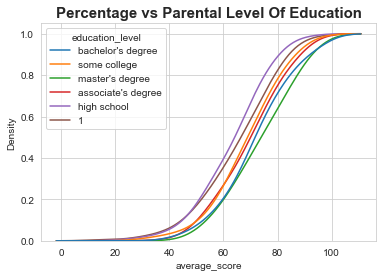

In [36]:
sns.kdeplot(
    data=df, x="average_score", hue="education_level",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.title('Percentage vs Parental Level Of Education',fontsize=15, fontweight='bold')

plt.show()


<center><h2 style ="background:#fddcc6;border:0;">추가내용끝 </h2></center>